# Find the fisherman

To illustrate a Bayesian inference workflow, we consider a concrete example. It is a slightly more complicated version of the Lighthouse Problem studied by Gull (1988) (Gull, S. F., 1988. Bayesian inductive inference and maximum entropy. In Maximum-entropy and Bayesian
methods in science and engineering, pp. 53–74).

The scenery is as follows: On a cold and foggy morning, the coastguard of a lovely fishing village receives an emergency call from one of the local fishermen. After his boat was hit by a gigantic wave, both the engine and the navigation system failed. All he is left with is an old compass and a flashlight that emits highly collimated light pulses. The coastguard instructs the fisherman to point his compass in the direction of the coast and to send as many flashes as he can. As he arrives on the shore, he can indeed see the light flashes through the fog, and he records them at positions $x_i^\text{obs} = d_i^\text{obs}$, for $i=1, 2, ..., N$. Can the coastguard infer the position of the fisherman based on these observations?

The model parameters of interest are the $x$- and $y$-coordinates of the boat, that is, $\mathbf{m}=(x,y)$. The forward problem relates $\mathbf{m}$ to the error-free synthetic observations,

\begin{equation}\label{E:fisher000a}
d_i = G(\mathbf{m}) = x\,,\qquad \text{for all}\,\, i=1, ..., N\,,
\end{equation}

meaning that each flash is recorded exactly at the $x$-position of the boat. However, the compass is not perfect. Hence, instead of pointing his flashlight precisely towards the coast, the light beam deviates from the normal to the coast by some angle $\varphi_i$, which is related to the observations $d_i^\text{obs} = x_i^\text{obs}$ via

\begin{equation}\label{E:fisher000}
d_i^\text{obs} = x + y\,\tan \varphi_i\,.
\end{equation}

Having studied the statistics of compass misorientations in great detail, the coastguard knows that the random variations of $\varphi$ can be modelled by a von Mises distribution

\begin{equation}\label{E:fisher001}
\rho_\text{vM}(\varphi)=k\,e^{\kappa\,\cos\,\varphi}\,,
\end{equation}

where $k$ is the normalisation constant, and the parameter $\kappa$ is a measure of concentration. The distribution of $\varphi$ relates to the distribution of observational errors. However, the coastguard observes realisations $d_i^\text{obs}$ of the random variable $d^\text{obs}$ and not of $\varphi$. To obtain the distribution of $d^\text{obs}$, we apply a coordinate transformation

\begin{equation}\label{E:fisher002}
\rho(d^\text{obs}|\mathbf{m}) = \rho_\text{vM}[\varphi(\mathbf{m})]\,\left| \frac{d\varphi}{dd^\text{obs}}  \right| = \rho_\text{vM} \left[  \arctan \left( \frac{d^\text{obs}-x}{y}  \right)  \right] \,\frac{y}{y^2 + (x-d^\text{obs})^2}\,.
\end{equation}

This equation is the prior probability density in data space for a single observation. Since the individual realisations of the observations $d_i^\text{obs}$ are independent and identically distributed, the distribution of the observed data vector $\mathbf{d}^\text{obs}=(d_1^\text{obs}, ..., d_N^\text{obs})$ equals the product of the individual distributions, that is,

\begin{equation}\label{E:fisher004}
\rho(\mathbf{d}^\text{obs}|\mathbf{m}) = \prod\limits_{i=1}^N \rho(d_i^\text{obs}|\mathbf{m})\,.
\end{equation}

Invoking Bayes' theorem, the posterior distribution is now given by

\begin{equation}\label{E:fisher005}
\rho(\mathbf{m}|\mathbf{d}^\text{obs}) = \rho(\mathbf{d}^\text{obs}|\mathbf{m}) \rho(\mathbf{m}) = \rho(\mathbf{m})\, \prod\limits_{i=1}^N \rho_\text{vM} \left[  \arctan \left( \frac{d_i^\text{obs}-x}{y}  \right)  \right] \,\frac{y}{y^2 + (x-d_i^\text{obs})^2}\,.
\end{equation}

The following notebook implements the previous equation using artificially computed observations.

# 0. Setup

We import some Phyton packages and make sure that figures are nice.

In [32]:
# Some Python packages.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import vonmises

# Set some parameters to make plots nicer.

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({"font.size": 30})
plt.rcParams["xtick.major.pad"] = "10"
plt.rcParams["ytick.major.pad"] = "10"

# 1. von Mises distribution

To get an impression of the von Mises distribution, we plot it for different values of $\kappa$.

601


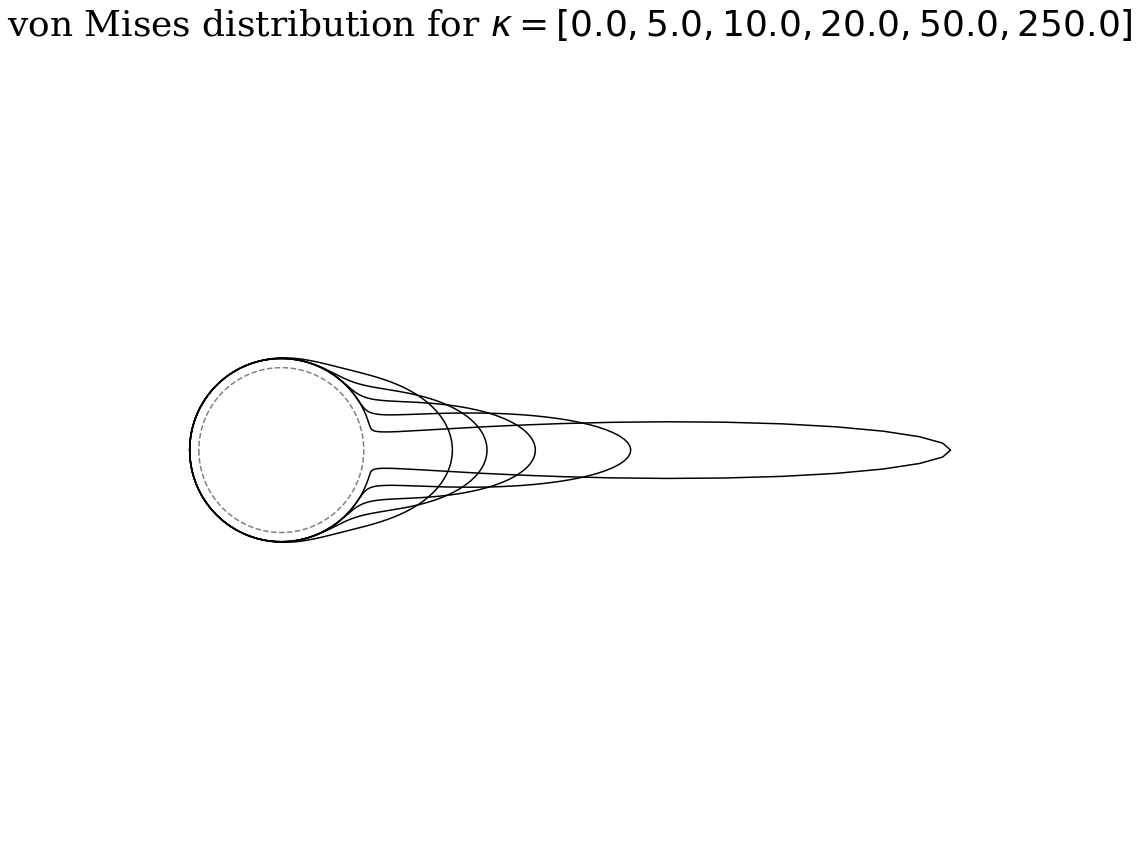

In [33]:
phi = np.arange(-np.pi, np.pi + np.pi / 300.0, np.pi / 300.0)
print(len(phi))

# unit circle
x = 0.9 * np.cos(phi)
y = 0.9 * np.sin(phi)

# von Mises distribution for a range of kappas
kappa = [0.0, 5.0, 10.0, 20.0, 50.0, 250.0]

plt.subplots(figsize=(15, 15))
plt.plot(x, y, "--", color=[0.5, 0.5, 0.5])

for k in kappa:

    # unit circle plus von Mises distribution
    px = (1.0 + vonmises.pdf(phi, k)) * np.cos(phi)
    py = (1.0 + vonmises.pdf(phi, k)) * np.sin(phi)
    plt.plot(px, py, "k")

plt.axis("equal")
plt.axis("off")
plt.title("von Mises distribution for $\kappa = {}$".format(kappa))
#plt.savefig("vonMises.pdf", format="pdf")
plt.show()

# 2. Computing artificial data

Since we conduct a synthetic experiment, we compute artificial observations. For this, we draw a random collection of angles $\phi_i$ from the von Mises distribution and then use it to compute the observation points $d_i^\text{obs}=x_i$. Prior to this, we still need to set $\kappa$, as well as the location of the fisherman's boat, $\mathbf{m}=(x,y)$.

[3.46843721 4.11798729 2.16757865 1.62981533 4.86480403 4.4026561
 4.66441931 5.62598452 3.81203022 4.74858775 5.01338949 5.64120415
 5.49633202 5.68413078 4.80737365 5.14384032 5.53136884 5.26299456
 9.06959019 4.40944082]


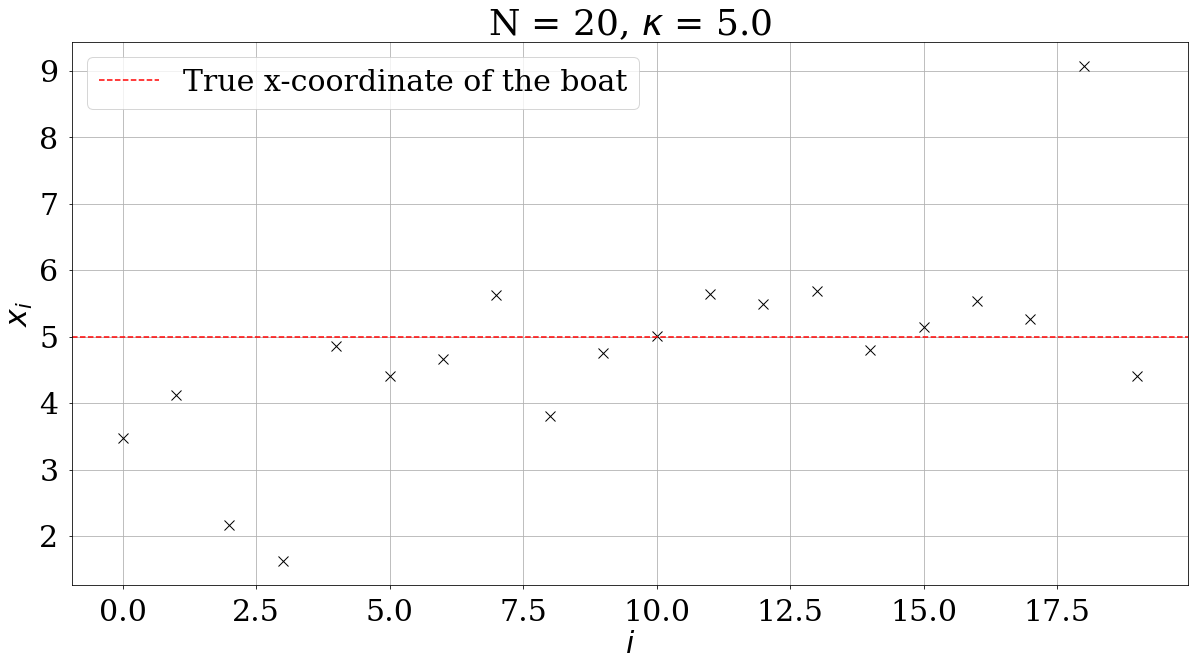

In [34]:
# Set parameter kappa of the von Mises distribution.
kappa_in = 5.0
# Set the location of the boat, which we want to estimate.
x_in = 5.0
y_in = 2.0
# Number of observations.
N = 20

# Draw random angles from the von Mises distribution.
phi_i = vonmises.rvs(kappa_in, size=N)
# Compute observation points along the coast.
x_i = y_in * np.tan(phi_i) + x_in
print(x_i)
# Display the observation points.
plt.subplots(figsize=(20, 10))
plt.plot(range(N), x_i, "kx", markersize=10)
plt.grid()
plt.ylabel(r"$x_i$")
plt.xlabel(r"$i$")
plt.axhline(y=x_in, color='r', linestyle='--', label="True x-coordinate of the boat")
plt.title("N = {}, $\kappa$ = {}".format(N,kappa_in))
plt.legend()
#plt.savefig("fisherman_vonMises_angles.pdf", format="pdf")
plt.show()

# 3. Compute posterior distribution

Assuming uniform priors on $x$ and $y$, we compute the posterior distribution $\rho(\mathbf{m}|\mathbf{d}^\text{obs})$ using Bayes' theorem. To avoid numerical over- or under-flow, we work with the logarithm of the posterior.

C:\Users\fabia\AppData\Local\Temp/ipykernel_160712/2700722352.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax1.pcolor(X, Y, rho, cmap="Greys")


<Figure size 432x288 with 0 Axes>

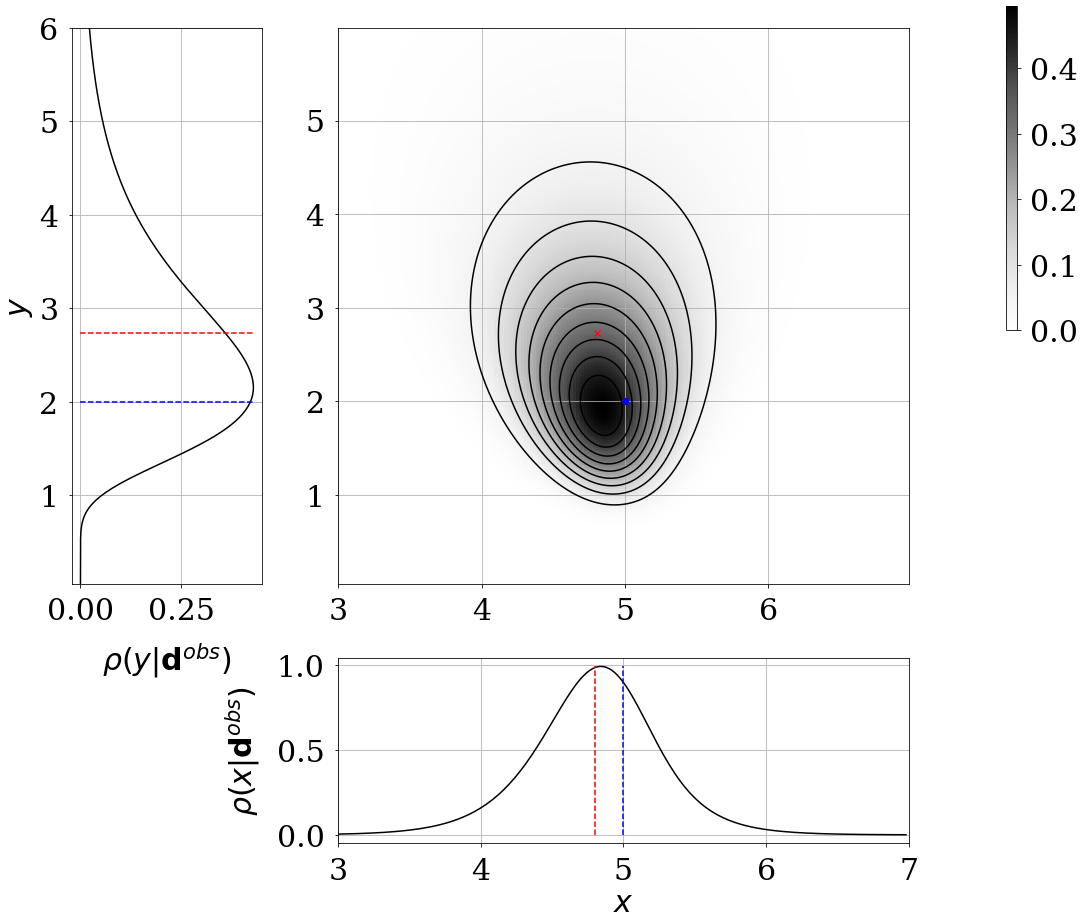

In [35]:
# Define a range of x- and y-values.
xmin = 3.0
xmax = 7.0
dx = 0.02
ymin = 0.05
ymax = 6.0
dy = 0.02
x = np.arange(xmin, xmax, dx)
y = np.arange(ymin, ymax, dy)
X, Y = np.meshgrid(x, y)

# Accumulate observations.
rho = 0.0

for i in range(N):
    phi = np.arctan((x_i[i] - X) / Y)
    # Logarithmic version of the posterior, written to avoid numpy overflow for large kappa.
    rho += (
        np.log10(vonmises.pdf(np.pi / 2.0, 1.0))
        + np.log10(Y / (Y ** 2 + (X - x_i[i]) ** 2))
        + kappa_in * np.cos(phi) * np.log10(np.e)
    )
    # rho+=np.log10(vonmises.pdf(phi,kappa_in)*Y/(Y**2+(X-x_i[i])**2))

# Find normalisation.
rho = np.exp(rho - np.max(rho))
c = np.sum(rho) * dx * dy
rho = rho / c

# Plot posterior distribution and marginals.
fig = plt.figure()
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
    2,
    2,
    figsize=(15, 15),
    gridspec_kw={"width_ratios": [1, 3], "height_ratios": [3, 1]},
)

# 2D posterior.
im = ax1.pcolor(X, Y, rho, cmap="Greys")
ax1.contour(X, Y, rho, colors="k", levels=10)
ax1.plot(x_in, y_in, "bo")#, MarkerSize=12)
ax1.grid()

cbaxes = fig.add_axes([0.99, 0.6, 0.01, 0.3])
plt.colorbar(im, cax=cbaxes, orientation="vertical")

# x marginal.
rho_x = np.sum(rho, axis=0)
rho_x = rho_x / (dx * sum(rho_x))
dx = x[1] - x[0]
mean_x = np.sum(x * rho_x) * dx

ax3.plot(x, rho_x, "k")
ax3.plot([x_in, x_in], [0.0, np.max(rho_x)], "--b")
ax3.plot([mean_x, mean_x], [0.0, np.max(rho_x)], "--r")
ax3.set_xlim((xmin, xmax))

ax3.set_xlabel(r"$x$")
ax3.set_ylabel(r"$\rho(x|\mathbf{d}^{obs})$", labelpad=15)
ax3.grid()

# y marginal
rho_y = np.sum(rho, axis=1)
rho_y = rho_y / (dy * sum(rho_y))
dy = y[1] - y[0]
mean_y = np.sum(y * rho_y) * dy

ax0.plot(rho_y, y, "k")
ax0.plot([0.0, np.max(rho_y)], [y_in, y_in], "--b")
ax0.plot([0.0, np.max(rho_y)], [mean_y, mean_y], "--r")
ax0.set_ylim((ymin, ymax))

ax0.set_ylabel(r"$y$")
ax0.set_xlabel(r"$\rho(y|\mathbf{d}^{obs})$", labelpad=15)
ax0.grid()

ax1.plot(mean_x, mean_y, "rx")#, MarkerSize=15)

ax2.axis("off")
#plt.tight_layout()
#plt.savefig("fisherman_kappainf_N10.pdf", format="pdf")
plt.show()